. because my developer account is free, it can only fetch 10 post per 15 minutes and can only  pulled max 100 post permonth

# Fetching Sentiment From X API

In [ ]:
import requests

BEARER_TOKEN = "yourBEARER_TOKEN"
headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
url = "https://api.twitter.com/2/tweets/search/recent?query=bitcoin lang:en"

resp = requests.get(url, headers=headers)
print(resp.status_code)
print(resp.json())

200
{'data': [{'text': "IT'S DAY 167\nPosting daily price of $BTC untill it reaches 1M 💲 significant mark.\n🗓️ 20/06/2025\n$BTC - $1,03,305\n$SUI - $2.726\nToday 🔥🔥 - #HODL\n💯Bitcoin started it all, setting the stage for the cryptocurrency revolution. Its journey has been monumental, leading the charge in", 'edit_history_tweet_ids': ['1936130930659258502'], 'id': '1936130930659258502'}, {'text': "@QuintenFrancois @StockHodl21 warned back at $106k that #Bitcoin might experience some turbulence in the short term, and it seems she was right.\n\nNow, the main thing is to ensure that $BTC doesn't close below the $103-100k zone, as that wouldn't be the best scenario.", 'edit_history_tweet_ids': ['1936130930554368274'], 'id': '1936130930554368274'}, {'text': '🔥 The BIGGЕST #Сryрtо #РUMР #Signаl is here! 🚀 Jоin the actiоn!\n\nhttps://t.co/dh67X0t8yQ $ETH\n\n @May4thCoin @Santi_SdB @FlipMancer @bitcoin_gyun @jackyleeking @Luisentr @JulieGianni @musti_x00 @Ragala00 @KingMaxSoL https://t.co/ogSb0

In [5]:
print(resp.headers)

{'Date': 'Fri, 20 Jun 2025 18:05:57 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '94', 'Connection': 'keep-alive', 'perf': '7402827104', 'Set-Cookie': 'guest_id_marketing=v1%3A175044275705439371; Max-Age=63072000; Expires=Sun, 20 Jun 2027 18:05:57 GMT; Path=/; Domain=.twitter.com; Secure; SameSite=None, guest_id_ads=v1%3A175044275705439371; Max-Age=63072000; Expires=Sun, 20 Jun 2027 18:05:57 GMT; Path=/; Domain=.twitter.com; Secure; SameSite=None, personalization_id="v1_BC2v2CNnvE5E7XTe7MWJUg=="; Max-Age=63072000; Expires=Sun, 20 Jun 2027 18:05:57 GMT; Path=/; Domain=.twitter.com; Secure; SameSite=None, guest_id=v1%3A175044275705439371; Max-Age=63072000; Expires=Sun, 20 Jun 2027 18:05:57 GMT; Path=/; Domain=.twitter.com; Secure; SameSite=None, __cf_bm=PPDlNChwtPFHmqELrqAuIX_c1SduMSPhw5YCqPXWJK0-1750442757-1.0.1.1-fePz1fA4e3Ma5xGHgW9DzpOZfRAq_c.qfE7lqawPAPP.R0zLUzRWoZXXCgYIFRn92B6dwslp5F3V6L2CHXu47Ypj8elIkvOn3yIO5FP8e0g; path=/; expires=Fri, 20-Jun-25 18:35

In [8]:
for tweet in resp.json()['data']:
    print(tweet['id'], tweet['text'])
    if 'attachments' in tweet:
        for media_id in tweet['attachments']['media_keys']:
            print(f"Media ID: {media_id}")
            media_url = f"https://api.twitter.com/2/media/{media_id}"
            media_resp = requests.get(media_url, headers=headers)
            if media_resp.status_code == 200:
                print(media_resp.json())
            else:
                print(f"Failed to fetch media: {media_resp.status_code}")

1936120677318455338 @Mericamemed Instantly start saving all my money so I can invest in BitCoin when it drops and become a Billionaire during the “Pandemic”.
1936120675322020008 China's moral authority is about as convincing as a bitcoin investment strategy https://t.co/THVsLrOuPm
1936120668967354481 RT @Vivek4real_: 🇺🇸 PUBLICLY TRADED SEMLER SCIENTIFIC JUST ANNOUNCED TO BUY $10 BILLION WORTH OF #BITCOIN 🤯

THIS IS WILD!!! https://t.co/s…
1936120667579060310 RT @_Crypto_Barbie: ⚠️ RIPPLE VS. SEC:

LAWYER SIGNALS FAST RULING:

JUDGE TORRES MAY MOVE QUICKLY IN RIPPLE VS. SEC CASE OVER #XRP ⚖️

htt…
1936120666983727499 RT @OnrampBitcoin: The national debt is now over $37 TRILLION.

The US is effectively a zombie company.

Debasement is inevitable.

Nothing…
1936120665838350763 7/ 🔑 Join us as we unlock the potential of Bitcoin and AI together!vGet ready for a thrilling ride into the world of productive financial opportunities. Let the collaboration begin! 🎊💪
1936120664999514354 RT @Cointe

# Analyzing

In [ ]:
pip install vaderSentiment

import

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
tweets = resp.json().get('data', [])

analyzer = SentimentIntensityAnalyzer()

Analyze

In [8]:
for tweet in tweets:
    text = tweet['text']
    sentiment = analyzer.polarity_scores(text)
    print(f"Tweet ID: {tweet['id']}, Sentiment: {sentiment}")
    
    if 'attachments' in tweet:
        for media_id in tweet['attachments']['media_keys']:
            print(f"Media ID: {media_id}")
            media_url = f"https://api.twitter.com/2/media/{media_id}"
            media_resp = requests.get(media_url, headers=headers)
            if media_resp.status_code == 200:
                print(media_resp.json())
            else:
                print(f"Failed to fetch media: {media_resp.status_code}")

Tweet ID: 1936130930659258502, Sentiment: {'neg': 0.086, 'neu': 0.86, 'pos': 0.054, 'compound': -0.4215}
Tweet ID: 1936130930554368274, Sentiment: {'neg': 0.111, 'neu': 0.836, 'pos': 0.053, 'compound': -0.4344}
Tweet ID: 1936130928352673839, Sentiment: {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.4559}
Tweet ID: 1936130927840960778, Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet ID: 1936130926305853574, Sentiment: {'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.2023}
Tweet ID: 1936130923214299385, Sentiment: {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.6696}
Tweet ID: 1936130922987798842, Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet ID: 1936130922581311885, Sentiment: {'neg': 0.075, 'neu': 0.721, 'pos': 0.204, 'compound': 0.4295}
Tweet ID: 1936130922295804215, Sentiment: {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.5106}
Tweet ID: 1936130922237370663, Sentiment: {'neg': 0.0, 'neu': 0.92, 'pos': 0.08

# Visualize

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def visualize_sentiment(tweets_with_sentiment):
    pos = sum(1 for t in tweets_with_sentiment if t['sentiment']['compound'] > 0.05)
    neg = sum(1 for t in tweets_with_sentiment if t['sentiment']['compound'] < -0.05)
    neu = len(tweets_with_sentiment) - pos - neg

    # Pie chart
    plt.figure(figsize=(5,5))
    plt.pie([pos, neu, neg], labels=['Positive', 'Neutral', 'Negative'],
            autopct='%1.1f%%', colors=['#00c853', '#ffd600', '#d50000'])
    plt.title('Sentiment Distribution')
    plt.show()

    # Bar chart
    plt.figure(figsize=(5,3))
    plt.bar(['Positive', 'Neutral', 'Negative'], [pos, neu, neg], color=['#00c853', '#ffd600', '#d50000'])
    plt.title('Sentiment Count')
    plt.ylabel('Number of Tweets')
    plt.show()

In [13]:
def show_extreme_tweets(tweets_with_sentiment):
    most_positive = max(tweets_with_sentiment, key=lambda t: t['sentiment']['compound'])
    most_negative = min(tweets_with_sentiment, key=lambda t: t['sentiment']['compound'])
    neutral_tweets = [t for t in tweets_with_sentiment if -0.05 <= t['sentiment']['compound'] <= 0.05]

    print("\nMost Positive Tweet:")
    print(f"Text: {most_positive['text']}")
    print(f"Score: {most_positive['sentiment']['compound']}")

    print("\nMost Negative Tweet:")
    print(f"Text: {most_negative['text']}")
    print(f"Score: {most_negative['sentiment']['compound']}")

    print("\nNeutral Tweets:")
    print(f"text: {len(neutral_tweets)} tweets")
    print("\n".join(t['text'] for t in neutral_tweets[:5]))  # Show first 5 neutral tweets

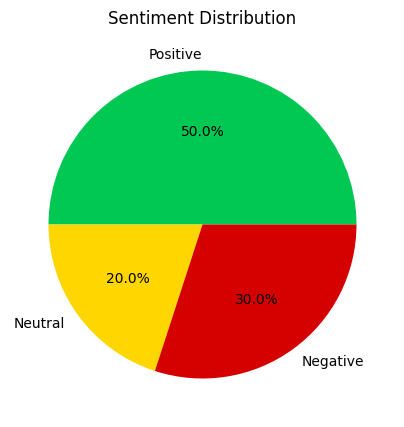

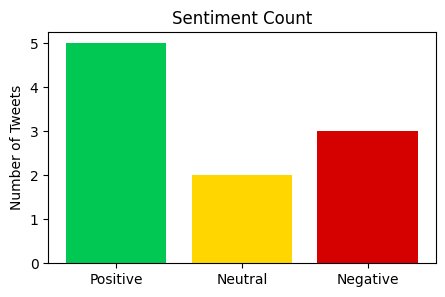


Most Positive Tweet:
Text: RT @opnetbtc: 🎉 100,000+ OP_WALLET Downloads!

Thank you to all builders, testers and believers in Bitcoin-native DeFi who are part of this…
Score: 0.6696

Most Negative Tweet:
Text: 🔥 The BIGGЕST #Сryрtо #РUMР #Signаl is here! 🚀 Jоin the actiоn!

https://t.co/dh67X0t8yQ $ETH

 @May4thCoin @Santi_SdB @FlipMancer @bitcoin_gyun @jackyleeking @Luisentr @JulieGianni @musti_x00 @Ragala00 @KingMaxSoL https://t.co/ogSb05GyW8
Score: -0.4559

Neutral Tweets:
text: 2 tweets
RT @SlyGoomba: Ive completed my goal of selling all my rental properties for Bitcoin. 

I now have zero additional sats.
RT @CryptoBull31: #Btc #bitcoin $btc

🤬Reason of this volatility 🤬

https://t.co/e3E5wUKg2D


In [14]:
tweets_with_sentiment = []
for tweet in tweets:
    text = tweet['text']
    sentiment = analyzer.polarity_scores(text)
    tweets_with_sentiment.append({'id': tweet['id'], 'text': text, 'sentiment': sentiment})

# Visualisasi
visualize_sentiment(tweets_with_sentiment)
show_extreme_tweets(tweets_with_sentiment)